# Preliminary Analysis
Cici

### Data Cleaning

In [137]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
url = "https://raw.githubusercontent.com/ljy0401/ECON-323-Group-Project/main/amazon.csv"
data = pd.read_csv(url)

In [9]:
da = data[["category", 
          "discounted_price", 
          "actual_price", 
          "discount_percentage", 
          "rating", 
          "rating_count"]]

In [10]:
for col in ["discounted_price", "actual_price", "rating_count"]:
    da[col] = da[col].str.replace("₹", "")
    da[col] = da[col].str.replace(",", "")
    
da["discount_percentage"] = da["discount_percentage"].str.replace("%", "")

da[["discounted_price", "actual_price", "discount_percentage", "rating", 
    "rating_count"]] = da[["discounted_price", "actual_price", "discount_percentage", "rating", 
    "rating_count"]].apply(pd.to_numeric, errors='coerce')

In [11]:
da.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0
1,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0
2,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0
3,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0
4,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0


### Glimpse of Data

- Product Category

For products that fall into the exact same category, there are not many varieties. 
A typical count would be <3.

In [12]:
da.groupby("category").count().describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,211.000000,211.000000,211.000000,211.000000,211.000000
mean,6.943128,6.943128,6.943128,6.938389,6.933649
std,18.717870,18.717870,18.717870,18.717728,18.603004
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000
max,233.000000,233.000000,233.000000,233.000000,231.000000


**!!! Solution 1**

To deal with that, one strategy may be only performing analysis on products that have more varieties.
However, 
1) the count drops rapidly, 
2) Cici is not sure if ~50 products is sufficient to do any analysis

In [7]:
da.groupby("category").count().nlargest(10, "discounted_price")

,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id
category,,,,,,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233,233,233,233,59,233
Electronics|WearableTechnology|SmartWatches,76,76,76,76,13,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68,68,68,68,5,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63,63,63,63,8,63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52,52,52,52,2,52
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49,49,49,49,38,49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27,27,27,27,3,27
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24,24,24,24,1,24
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24,24,24,24,6,24


!!! **Solution 2**

Alternatively, we could elevate the categorical level, i.e. to amalgamate multiple branches into one big category.

This usually means only keeping the first 1-2 big categories.

In terms of coding, I came up with possible ways (the first one seems to be easier):

1) "Electronics" `in` category's name (see tentative code below)

advantage: it is doable and provides considerable observations for one category

drawback: it requires some way to identify the number of large categories (may need to do parsing in 2).

2) parsing "..|..|.." format

drawback: google how to do it

In [8]:
def electronics(a):
    return "Electronics" in a

all_electronics = da["category"].apply(electronics)
da[all_electronics].count()

category               530
discounted_price       530
actual_price           530
discount_percentage    530
rating                 530
rating_count            97
user_id                530
dtype: int64

In [9]:
def homekitchen(a):
    return "Home&Kitchen|Kitchen&HomeAppliances" in a

all_home_kitchen = da["category"].apply(homekitchen)
da[all_home_kitchen].count()

category               308
discounted_price       308
actual_price           308
discount_percentage    308
rating                 307
rating_count            92
user_id                308
dtype: int64

- Experience of Users

If we want to do an analysis based on users (e.g, experienced users tend to rate higher for the products), it would be difficult.
As from the table, the mean and median are around 1 - a typical user only rate one product in this dataset.

In [10]:
da.groupby("user_id").count().describe()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,1.226968,1.226968,1.226968,1.226968,1.226131,0.273032
std,0.772262,0.772262,0.772262,0.772262,0.773050,0.497261
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000


### Regression Model

#### Simple Regression

In [13]:
from sklearn import linear_model
import seaborn as sns

In [14]:
lr_model = linear_model.LinearRegression()

In [22]:
lr_model.fit(X = da[da.notnull().all(1)][['discount_percentage']], 
             y = da[da.notnull().all(1)][['rating_count']])
beta_0 = lr_model.intercept_
beta_1 = lr_model.coef_[0]
print(f"Fit model: rating_count = {beta_0} + {beta_1} discount_percentage")

Fit model: rating_count = [17242.01785005] + [22.34751716] discount_percentage


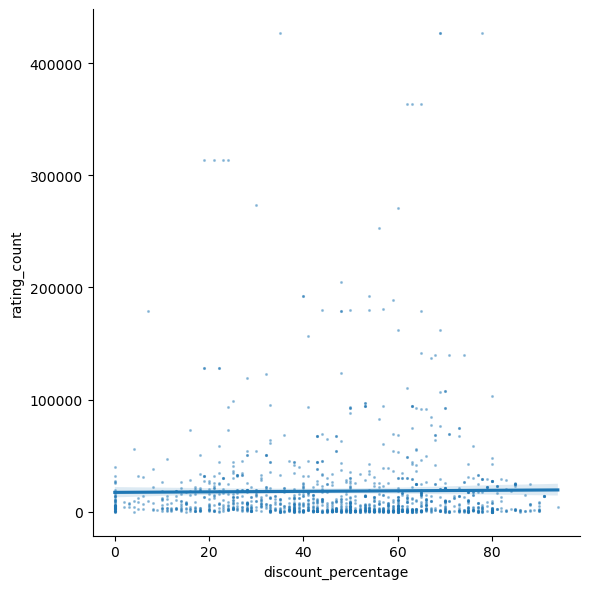

In [23]:
sns.lmplot(
    data=da, x="discount_percentage", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
);

Rather intuitive: more discount, selling more.

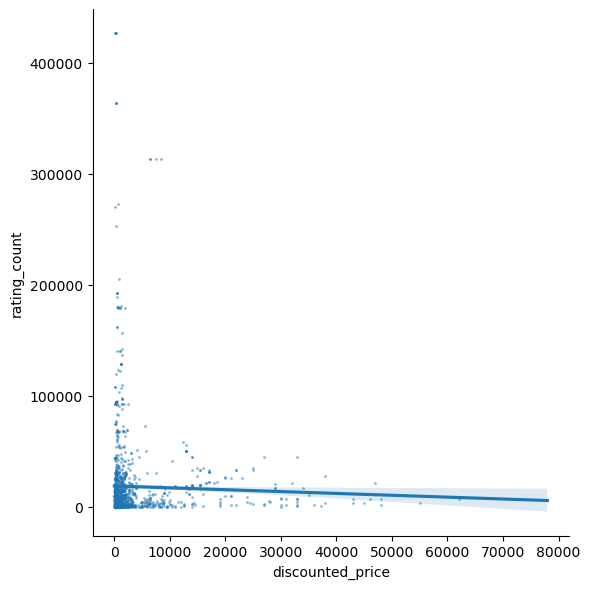

In [41]:
sns.lmplot(
    data=da, x="discounted_price", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
);

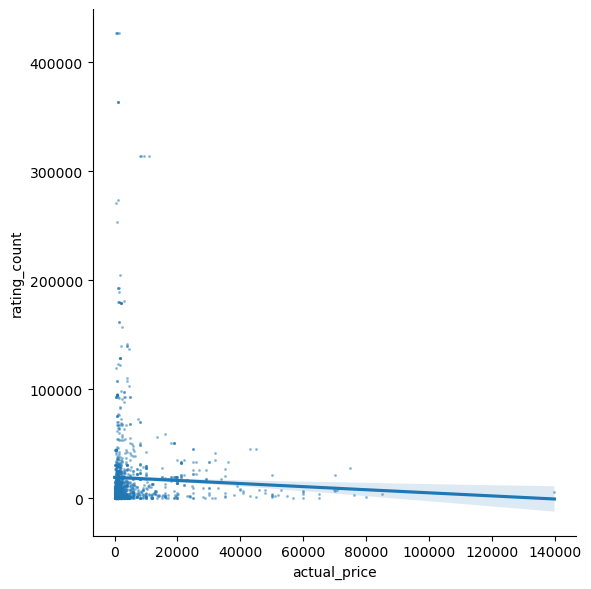

In [43]:
sns.lmplot(
    data=da, x="actual_price", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
);

Selling volume decreases as (discounted) price goes up, as what the very basic ECON 101 microeconomics theory suggests - does not give much interesting new information.

### Multiple Regression

#### Category as explanatory variable?
Which category that the product falls into may impact our analysis result. To investigate this effect, we may add a specification where take "categorization" as control. To do this, one has to first do one-hot encoding (i.e., transforming it into dummies).

In [27]:
pd.get_dummies(da["category"]).shape[0]

1465

However, it is unrealistic to transform each category, or we will get 1465 dummy variables. Instead, depending on how we categorize (previous section), we will result in fewer dummies.

#### explanatory var: discounted_percentage + rating

In [152]:
multi_lr_model = linear_model.LinearRegression()

X = da[da.notnull().all(1)][['discount_percentage', 'rating']]
y = da[da.notnull().all(1)]["rating_count"]

multi_lr_model.fit(X = X, y = da[da.notnull().all(1)][['rating_count']])
beta_0 = multi_lr_model.intercept_
beta_1 = multi_lr_model.coef_[0,0]
beta_2 = multi_lr_model.coef_[0,1]

print(f"Fit model: rating_count = {beta_0} + {beta_1:.4f} discount_percentage + {beta_2:.4f} rating")

Fit model: rating_count = [-48821.76094653] + 55.1764 discount_percentage + 15744.0093 rating


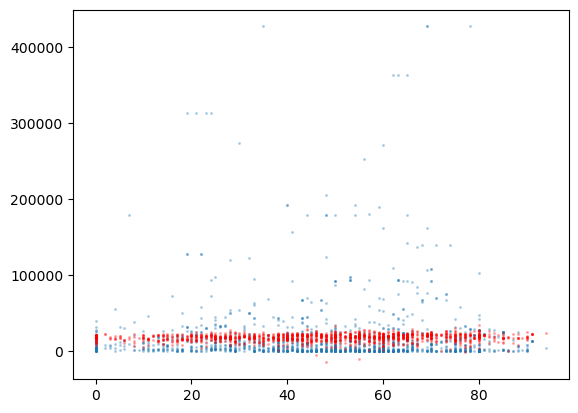

In [158]:
prediction1 = multi_lr_model.predict(da[da.notnull().all(1)][["discount_percentage","rating"]])
X1 = X['discount_percentage']

fig, ax = plt.subplots()

ax.scatter(X1, y, s=1.5, alpha=0.25) 
ax.scatter(X1, prediction1, s=1.5, c="red", alpha=0.25) 
# ax.set_ylim([0,100000])

##### The intercept is negative?

The intercept is negative, but there is no need to worry much because as long as the rating is at least 3.101, the selling volume is positive. Even with rating below 3.101, there are only 14 such products which have a average discount_percentage of 64.

In [115]:
multi_lr_model.predict([[0, 3.101]])[0]

array([0.41189084])

In [92]:
da[da["rating"]<3.101].describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,14.000000,14.000000,14.000000,14.000000,13.000000
mean,563.785714,1648.785714,64.428571,2.842857,606.461538
std,355.535604,833.228954,15.295622,0.332159,1101.848872
min,161.000000,300.000000,38.000000,2.000000,2.000000
25%,219.500000,999.000000,52.750000,2.800000,24.000000
50%,499.000000,1599.000000,66.000000,3.000000,109.000000
75%,772.750000,2149.000000,77.000000,3.075000,617.000000
max,1299.000000,3499.000000,86.000000,3.100000,3527.000000


In [127]:
(prediction1<=0).sum()

4

In fact, only 4 predictions have negative values.

#### Add "discounted_price" as explanatory variable

In [133]:
multi_lr_model = linear_model.LinearRegression()

X = da[da.notnull().all(1)][['discount_percentage', 'rating', 'discounted_price']]

multi_lr_model.fit(X = X, y = da[da.notnull().all(1)][['rating_count']])
beta_0 = multi_lr_model.intercept_
beta_1 = multi_lr_model.coef_[0,0]
beta_2 = multi_lr_model.coef_[0,1]
beta_3 = multi_lr_model.coef_[0,2]

print(f"Fit model: rating_count = {beta_0} + {beta_1:.4f} discount_percentage + {beta_2:.4f} rating + {beta_3:.4f} discounted_price")

Fit model: rating_count = [-49211.2531188] + 38.9491 discount_percentage + 16196.2798 rating + -0.2204 discounted_price


Notice $\beta_3$ is almost 0. 

Changing discounted price to the actual price will give a similar result.

In [136]:
multi_lr_model = linear_model.LinearRegression()

X = da[da.notnull().all(1)][['discount_percentage', 'rating', 'actual_price']]

multi_lr_model.fit(X = X, y = da[da.notnull().all(1)][['rating_count']])
beta_0 = multi_lr_model.intercept_
beta_1 = multi_lr_model.coef_[0,0]
beta_2 = multi_lr_model.coef_[0,1]
beta_3 = multi_lr_model.coef_[0,2]

print(f"Fit model: rating_count = {beta_0} + {beta_1:.4f} discount_percentage + {beta_2:.4f} rating + {beta_3:.4f} actual_price")

Fit model: rating_count = [-50406.42049728] + 45.7291 discount_percentage + 16487.4028 rating + -0.1853 actual_price
